In [4]:
!pip install nltk
!pip install gensim
!pip install pyLDAvis
!pip install WordCloud

!pip install xgboost
!pip install gensim
!pip install wordcloud
!python -m spacy download en_core_web_lg
!pip install spacy
!pip install textblob
!pip install -U imbalanced-learn


     -------------------------------------- 587.7/587.7 MB 2.4 MB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [5]:
from sklearn.preprocessing import LabelEncoder
import nltk
import re 
import gensim
import pyLDAvis
import spacy
import pylab
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
import warnings
warnings.filterwarnings('ignore')
import string
from gensim.utils import simple_preprocess
from gensim.models import LdaModel
from gensim import corpora
from gensim.corpora import Dictionary
import pyLDAvis.gensim_models
from gensim.models import Word2Vec
from gensim.models.word2vec import LineSentence
from gensim.models import CoherenceModel
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from imblearn import under_sampling, over_sampling
from sklearn.datasets import make_classification
from collections import Counter
from imblearn.over_sampling import SMOTE

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\NAGARJUNA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\NAGARJUNA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\NAGARJUNA\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\NAGARJUNA\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\NAGARJUNA\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import xgboost as xgb
from sklearn.svm import SVC 
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import f1_score, classification_report, precision_score, recall_score
from sklearn.ensemble import ExtraTreesClassifier
import warnings
warnings.filterwarnings('ignore')




In [7]:
df=pd.read_csv("emails.txt")
df

,Unnamed: 0,filename,Message-ID,content,Class
0,0,arnold-j/_sent_mail/34.,<15267340.1075857594923.JavaMail.evans@thyme>,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,Abusive
1,1,arnold-j/_sent_mail/517.,<15539583.1075857652152.JavaMail.evans@thyme>,fuck you,Abusive
2,2,arnold-j/_sent_mail/743.,<4339799.1075857657711.JavaMail.evans@thyme>,Gentlemen:\nThe following champagne is availab...,Abusive
3,3,arnold-j/_sent_mail/766.,<25574783.1075857658215.JavaMail.evans@thyme>,sorry i've taken so long...just been trying to...,Abusive
4,4,arnold-j/_sent_mail/797.,<19506151.1075857658895.JavaMail.evans@thyme>,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,Abusive
...,...,...,...,...,...
48071,48071,campbell-l/notes_inbox/133.,<6503484.1075857876489.JavaMail.evans@thyme>,"Dear Market Participants,\n\nPlease note the c...",Non Abusive
48072,48072,campbell-l/notes_inbox/134.,<17277180.1075857876513.JavaMail.evans@thyme>,"According to my fancy ciphering we made $310,0...",Non Abusive
48073,48073,campbell-l/notes_inbox/135.,<31066400.1075857876537.JavaMail.evans@thyme>,BUSINESS HIGHLIGHTS\n\nWeather Group\n\nLet=01...,Non Abusive
48074,48074,campbell-l/notes_inbox/136.,<26024436.1075857876659.JavaMail.evans@thyme>,Welcome to: DIAMONDS NEWSLETTER Issue:...,Non Abusive


In [8]:
df.sample(5)

,Unnamed: 0,filename,Message-ID,content,Class
24553,24553,beck-s/_sent_mail/770.,<15075075.1075856093998.JavaMail.evans@thyme>,"Good response, Bob. Thanks for leading the wa...",Non Abusive
2954,2954,scott-s/discussion_threads/1235.,<9174095.1075846779113.JavaMail.evans@thyme>,---------------------- Forwarded by Kori Loibl...,Abusive
15186,15186,bass-e/all_documents/1471.,<19434770.1075854615273.JavaMail.evans@thyme>,i'm getting really freaking tired of being las...,Non Abusive
16888,16888,bass-e/deleted_items/292.,<33033913.1075861324785.JavaMail.evans@thyme>,FOR IMMEDIATE RELEASE\n\nPROS Revenue Manageme...,Non Abusive
22151,22151,baughman-d/discussion_threads/47.,<8520205.1075848322377.JavaMail.evans@thyme>,We have received the executed EEI contract fro...,Non Abusive


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48076 entries, 0 to 48075
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  48076 non-null  int64 
 1   filename    48076 non-null  object
 2   Message-ID  48076 non-null  object
 3   content     48076 non-null  object
 4   Class       48076 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.8+ MB


In [10]:
df['Class'].value_counts()

Class
Non Abusive    44666
Abusive         3410
Name: count, dtype: int64

In [11]:
df.duplicated().sum()

0

In [12]:
df.rename({'content':'Text','Class':'Target'},axis=1,inplace=True)
df

,Unnamed: 0,filename,Message-ID,Text,Target
0,0,arnold-j/_sent_mail/34.,<15267340.1075857594923.JavaMail.evans@thyme>,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,Abusive
1,1,arnold-j/_sent_mail/517.,<15539583.1075857652152.JavaMail.evans@thyme>,fuck you,Abusive
2,2,arnold-j/_sent_mail/743.,<4339799.1075857657711.JavaMail.evans@thyme>,Gentlemen:\nThe following champagne is availab...,Abusive
3,3,arnold-j/_sent_mail/766.,<25574783.1075857658215.JavaMail.evans@thyme>,sorry i've taken so long...just been trying to...,Abusive
4,4,arnold-j/_sent_mail/797.,<19506151.1075857658895.JavaMail.evans@thyme>,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,Abusive
...,...,...,...,...,...
48071,48071,campbell-l/notes_inbox/133.,<6503484.1075857876489.JavaMail.evans@thyme>,"Dear Market Participants,\n\nPlease note the c...",Non Abusive
48072,48072,campbell-l/notes_inbox/134.,<17277180.1075857876513.JavaMail.evans@thyme>,"According to my fancy ciphering we made $310,0...",Non Abusive
48073,48073,campbell-l/notes_inbox/135.,<31066400.1075857876537.JavaMail.evans@thyme>,BUSINESS HIGHLIGHTS\n\nWeather Group\n\nLet=01...,Non Abusive
48074,48074,campbell-l/notes_inbox/136.,<26024436.1075857876659.JavaMail.evans@thyme>,Welcome to: DIAMONDS NEWSLETTER Issue:...,Non Abusive


In [13]:
df.drop(["Unnamed: 0", "filename","Message-ID"],axis=1,inplace=True)


In [14]:
df.head()

,Text,Target
0,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,Abusive
1,fuck you,Abusive
2,Gentlemen:\nThe following champagne is availab...,Abusive
3,sorry i've taken so long...just been trying to...,Abusive
4,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,Abusive


In [15]:
df['Target'].value_counts()

Target
Non Abusive    44666
Abusive         3410
Name: count, dtype: int64

In [16]:
df[df.duplicated()]

,Text,Target
7,sorry i've taken so long...just been trying to...,Abusive
8,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,Abusive
9,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/24...,Abusive
10,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,Abusive
11,Do you know my hr rep's name?\n\n\n\nJennifer ...,Abusive
...,...,...
48071,"Dear Market Participants,\n\nPlease note the c...",Non Abusive
48072,"According to my fancy ciphering we made $310,0...",Non Abusive
48073,BUSINESS HIGHLIGHTS\n\nWeather Group\n\nLet=01...,Non Abusive
48074,Welcome to: DIAMONDS NEWSLETTER Issue:...,Non Abusive


In [17]:
df.duplicated().sum()

23420

In [18]:
df.drop_duplicates(inplace= True)

In [19]:
df.head()

,Text,Target
0,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,Abusive
1,fuck you,Abusive
2,Gentlemen:\nThe following champagne is availab...,Abusive
3,sorry i've taken so long...just been trying to...,Abusive
4,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,Abusive


In [20]:
df['Target'].value_counts()

Target
Non Abusive    23014
Abusive         1642
Name: count, dtype: int64

In [21]:
encoder=LabelEncoder()

In [22]:
df['Target']=encoder.fit_transform(df['Target'])

In [23]:
# 1= Non Abusive 
# 0 = Abusive
df.Target.value_counts()


Target
1    23014
0     1642
Name: count, dtype: int64

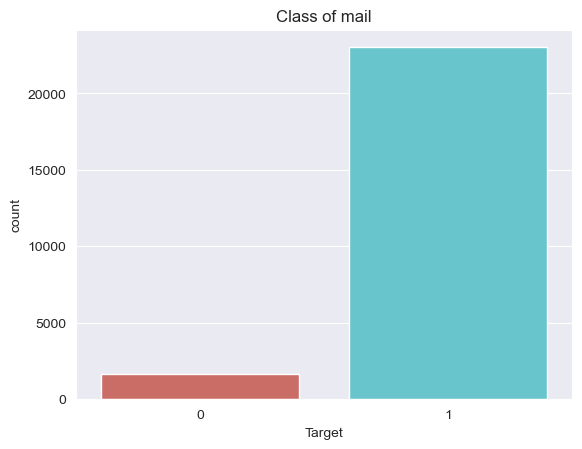

In [24]:
sns.countplot(x=df['Target'], palette='hls')
plt.title("Class of mail")
plt.show()

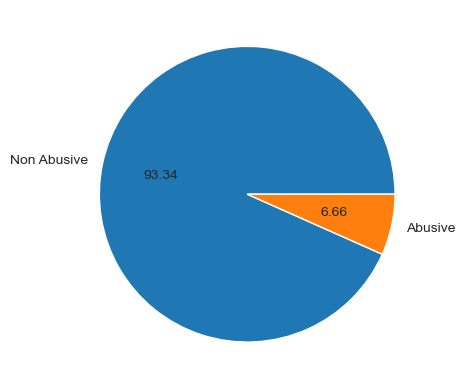

In [25]:
plt.pie(df['Target'].value_counts(), labels=['Non Abusive','Abusive'],autopct= '%0.2f')
plt.show()

In [26]:
df['num-char']=df['Text'].apply(len)
df.head()

,Text,Target,num-char
0,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,0,220
1,fuck you,0,8
2,Gentlemen:\nThe following champagne is availab...,0,612
3,sorry i've taken so long...just been trying to...,0,505
4,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,0,203


In [27]:
df['word_count']=df['Text'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

,Text,Target,num-char,word_count
0,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,0,220,44
1,fuck you,0,8,2
2,Gentlemen:\nThe following champagne is availab...,0,612,99
3,sorry i've taken so long...just been trying to...,0,505,163
4,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,0,203,42


In [28]:
df['sentence_count']=df['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,Text,Target,num-char,word_count,sentence_count
0,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,0,220,44,1
1,fuck you,0,8,2,1
2,Gentlemen:\nThe following champagne is availab...,0,612,99,6
3,sorry i've taken so long...just been trying to...,0,505,163,8
4,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,0,203,42,2


In [29]:
df[['num-char','word_count','sentence_count']].describe()

,num-char,word_count,sentence_count
count,24656.000000,24656.000000,24656.000000
mean,1798.708306,340.321017,12.479031
std,5394.644531,818.334355,26.660055
min,1.000000,1.000000,1.000000
25%,264.000000,51.000000,3.000000
50%,729.000000,142.000000,6.000000
75%,1748.000000,344.000000,13.000000
max,272036.000000,32337.000000,1084.000000


In [30]:
len(df)

24656

In [31]:
stop = stopwords.words('english')
df['Stopwords'] = df['Text'].apply(lambda x: len([x for x in x.split() if x in stop]))
df[['Text','Stopwords']].head()

,Text,Stopwords
0,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,1
1,fuck you,1
2,Gentlemen:\nThe following champagne is availab...,11
3,sorry i've taken so long...just been trying to...,23
4,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,2


In [32]:
df['Numerics'] = df['Text'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
df[['Text','Numerics']].head()

,Text,Numerics
0,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,1
1,fuck you,0
2,Gentlemen:\nThe following champagne is availab...,21
3,sorry i've taken so long...just been trying to...,0
4,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,3


In [33]:
df.head()

,Text,Target,num-char,word_count,sentence_count,Stopwords,Numerics
0,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,0,220,44,1,1,1
1,fuck you,0,8,2,1,1,0
2,Gentlemen:\nThe following champagne is availab...,0,612,99,6,11,21
3,sorry i've taken so long...just been trying to...,0,505,163,8,23,0
4,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,0,203,42,2,2,3


In [34]:
df['Text'][0]

'eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/18/2000 01:01 PM\nTo: John Arnold/HOU/ECT@ECT\ncc:  \nSubject: \n\nFootball bets 200 each\n\nMinn -9.5\nBuff +2.5\nPhil -7\nIndi -4.5\nCinnci +7\nDet +6\nclev +16\nDen +9.5\nDall +7.5\nJack +3.5\n\n\n'

In [35]:
def preprocess(sentence):
    sentence = str(sentence)# Convert input to a string
    sentence = sentence.lower() # Convert the sentence to lowercase
    sentence = sentence.replace('{@}',"") # Remove '{@}' from the sentence
    cleanr = re.compile('\n/:-+.?!""')  # Define a regular expression pattern to match characters to be removed
    cleantext = re.sub(cleanr, '', sentence) # Remove the matched characters from the sentence
    rem_url = re.sub(r'http\S+', '',cleantext) # Remove URLs from the sentence
    rem_num = re.sub('[0-9]+', '', rem_url) # Remove digits/numbers from the sentence
    tokenizer = RegexpTokenizer(r'\w+')# Create a tokenizer that splits on word boundaries
    tokens = tokenizer.tokenize(rem_num)# Tokenize the sentence into words
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]      
 # Create a list of filtered words, removing stopwords and words with length <= 2

    return " ".join(filtered_words)  # Join the filtered words back into a sentence

In [36]:
df['cleaned_mails'] = df.Text.apply(lambda x: preprocess(x))

In [37]:
df.head()

,Text,Target,num-char,word_count,sentence_count,Stopwords,Numerics,cleaned_mails
0,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,0,220,44,1,1,1,eat shit john lavorato excelr john arnold hou ...
1,fuck you,0,8,2,1,1,0,fuck
2,Gentlemen:\nThe following champagne is availab...,0,612,99,6,11,21,gentlemen following champagne available approx...
3,sorry i've taken so long...just been trying to...,0,505,163,8,23,0,sorry taken long trying fend chicks life soooo...
4,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,0,203,42,2,2,3,asshole john lavorato excelr john arnold hou e...


In [38]:
df['cleaned_mails']

0        eat shit john lavorato excelr john arnold hou ...
1                                                     fuck
2        gentlemen following champagne available approx...
3        sorry taken long trying fend chicks life soooo...
4        asshole john lavorato excelr john arnold hou e...
                               ...                        
47974    need new leads business need increased interne...
47975    image image image garth brooks wrapped image i...
47977    image image image dear smartreminders member i...
47980    image image image image kid rock forever image...
47981    received mail registered trade web site one pa...
Name: cleaned_mails, Length: 24656, dtype: object

In [39]:
df.drop(['num-char','word_count','sentence_count','Stopwords','Numerics'],axis=1,  inplace=True)
df.head()

,Text,Target,cleaned_mails
0,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,0,eat shit john lavorato excelr john arnold hou ...
1,fuck you,0,fuck
2,Gentlemen:\nThe following champagne is availab...,0,gentlemen following champagne available approx...
3,sorry i've taken so long...just been trying to...,0,sorry taken long trying fend chicks life soooo...
4,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,0,asshole john lavorato excelr john arnold hou e...


In [40]:
df['cleaned_mails'][4]

'asshole john lavorato excelr john arnold hou ect ect subject john cant seem make gambling problem away bills denver jack'

In [41]:
df['cleaned_mails']

0        eat shit john lavorato excelr john arnold hou ...
1                                                     fuck
2        gentlemen following champagne available approx...
3        sorry taken long trying fend chicks life soooo...
4        asshole john lavorato excelr john arnold hou e...
                               ...                        
47974    need new leads business need increased interne...
47975    image image image garth brooks wrapped image i...
47977    image image image dear smartreminders member i...
47980    image image image image kid rock forever image...
47981    received mail registered trade web site one pa...
Name: cleaned_mails, Length: 24656, dtype: object

In [42]:
df.to_csv("Cleaned_mails", index=False)

In [43]:
Mails=pd.read_csv("Cleaned_mails")
Mails.head()

,Text,Target,cleaned_mails
0,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,0,eat shit john lavorato excelr john arnold hou ...
1,fuck you,0,fuck
2,Gentlemen:\nThe following champagne is availab...,0,gentlemen following champagne available approx...
3,sorry i've taken so long...just been trying to...,0,sorry taken long trying fend chicks life soooo...
4,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,0,asshole john lavorato excelr john arnold hou e...


In [44]:
Mails.drop(['Text'],axis=1,inplace=True)

In [45]:
Mails.head()

,Target,cleaned_mails
0,0,eat shit john lavorato excelr john arnold hou ...
1,0,fuck
2,0,gentlemen following champagne available approx...
3,0,sorry taken long trying fend chicks life soooo...
4,0,asshole john lavorato excelr john arnold hou e...


In [46]:
df = pd.DataFrame(Mails)

In [47]:
Mails.dtypes

Target            int64
cleaned_mails    object
dtype: object

In [48]:
# Define a set of stopwords including additional characters
oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])
# Initialize lists to store words and sentences
totalWords =[]
Sentences = Mails['cleaned_mails'].values
cleanedSentences = ""
# Loop through each email text in the dataset
for records in Sentences:
        # Preprocess the email text
    cleanedText = preprocess(records)
    cleanedSentences += cleanedText     # Preprocess the email text
    requiredWords = nltk.word_tokenize(cleanedText)     # Tokenize the preprocessed text into words
    for word in requiredWords:      # Filter out stopwords and punctuation, then add to totalWords list
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)

wordfreqdist = nltk.FreqDist(totalWords)  # Calculate word frequency distribution
mostcommon = wordfreqdist.most_common(20) # Get the 20 most common words and their frequencies
print(mostcommon)

[('excelr', 60482), ('ect', 39984), ('com', 36779), ('font', 28275), ('hou', 20062), ('subject', 18518), ('please', 17044), ('time', 13259), ('message', 13004), ('would', 12848), ('image', 12468), ('new', 12139), ('sent', 11781), ('one', 11028), ('size', 10771), ('original', 10178), ('get', 10056), ('may', 9880), ('align', 9778), ('mail', 9559)]


In [49]:
# Initialize the stemmer
stemmer = PorterStemmer()

# Function to apply stemming to words in a sentence
def apply_stemming(sentence):
    words = word_tokenize(sentence)
    stemmed_words = [stemmer.stem(word) for word in words]
    return ' '.join(stemmed_words)

# Apply stemming to the 'cleaned-mails' column, considering only string values
df['stemmed-mails'] = df['cleaned_mails'][:10].apply(
    lambda x: apply_stemming(x) if isinstance(x, str) else x
)

# Print the original and stemmed text data
for original, stemmed in zip(Mails['cleaned_mails'][:10], df['stemmed-mails']):
    print(f"Original: {original}\nStemmed: {stemmed}\n")

Original: eat shit john lavorato excelr john arnold hou ect ect subject football bets minn buff phil indi cinnci det clev den dall jack
Stemmed: eat shit john lavorato excelr john arnold hou ect ect subject footbal bet minn buff phil indi cinnci det clev den dall jack

Original: fuck
Stemmed: fuck

Original: gentlemen following champagne available approximate retail price also interest trading red wine retail prices derived spec website winesearcer com wine stored temperature controlled private wine storage facility quan vintage wine retail perrier jouet brut fleur champagne piper heidsek reserve dom perignon veuve cliquot ponsardin grande dame taittenger millesine brut jacquart millesine roederer cristal interest
Stemmed: gentlemen follow champagn avail approxim retail price also interest trade red wine retail price deriv spec websit winesearc com wine store temperatur control privat wine storag facil quan vintag wine retail perrier jouet brut fleur champagn piper heidsek reserv dom p

In [50]:
# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to map part of speech (POS) tags from Treebank to WordNet
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN  # Default to noun

# Function to apply lemmatization to words in a sentence
def apply_lemmatization(sentence):
    words = word_tokenize(sentence)
    pos_tags = nltk.pos_tag(words)  # Part of speech tagging
    lemmatized_words = [lemmatizer.lemmatize(word, get_wordnet_pos(pos)) for word, pos in pos_tags]
    return ' '.join(lemmatized_words)

# Apply lemmatization to the 'cleaned_mails' column, considering only string values
df['lemmatized-mails'] = df['cleaned_mails'][:10].apply(
    lambda x: apply_lemmatization(x) if isinstance(x, str) else x
)

# Print the original and lemmatized text data
for original, lemmatized in zip(df['cleaned_mails'][:10], df['lemmatized-mails']):
    print(f"Original: {original}\nLemmatized: {lemmatized}\n")

Original: eat shit john lavorato excelr john arnold hou ect ect subject football bets minn buff phil indi cinnci det clev den dall jack
Lemmatized: eat shit john lavorato excelr john arnold hou ect ect subject football bet minn buff phil indi cinnci det clev den dall jack

Original: fuck
Lemmatized: fuck

Original: gentlemen following champagne available approximate retail price also interest trading red wine retail prices derived spec website winesearcer com wine stored temperature controlled private wine storage facility quan vintage wine retail perrier jouet brut fleur champagne piper heidsek reserve dom perignon veuve cliquot ponsardin grande dame taittenger millesine brut jacquart millesine roederer cristal interest
Lemmatized: gentleman follow champagne available approximate retail price also interest trading red wine retail price derive spec website winesearcer com wine store temperature control private wine storage facility quan vintage wine retail perrier jouet brut fleur cham

In [51]:
def sent_to_words(sentences):
     for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(Mails['cleaned_mails']))

print(data_words[:1])


[['eat', 'shit', 'john', 'lavorato', 'excelr', 'john', 'arnold', 'hou', 'ect', 'ect', 'subject', 'football', 'bets', 'minn', 'buff', 'phil', 'indi', 'cinnci', 'det', 'clev', 'den', 'dall', 'jack']]


In [52]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

['eat', 'shit', 'john', 'lavorato', 'excelr', 'john', 'arnold', 'hou', 'ect', 'ect', 'subject', 'football', 'bets', 'minn', 'buff', 'phil', 'indi', 'cinnci', 'det', 'clev', 'den', 'dall', 'jack']


In [53]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [54]:
#Gensim creates a unique id for each word in the document. 
#The produced corpus shown above is a mapping of (word_id, word_frequency).
id2word = corpora.Dictionary(data_words)

# Create Corpus
texts = data_words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 2), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 2), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1)]]


In [55]:
#If we want to see what word a given id corresponds to, pass the id as a key to the dictionary.
id2word[0]

'arnold'

In [56]:
#we can see a human-readable form of the corpus itself.
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('arnold', 1),
  ('bets', 1),
  ('buff', 1),
  ('cinnci', 1),
  ('clev', 1),
  ('dall', 1),
  ('den', 1),
  ('det', 1),
  ('eat', 1),
  ('ect', 2),
  ('excelr', 1),
  ('football', 1),
  ('hou', 1),
  ('indi', 1),
  ('jack', 1),
  ('john', 2),
  ('lavorato', 1),
  ('minn', 1),
  ('phil', 1),
  ('shit', 1),
  ('subject', 1)]]

In [57]:

dictionary = corpora.Dictionary(data_words)
doc_term_matrix = [dictionary.doc2bow(rev) for rev in data_words]

In [58]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=doc_term_matrix,
                                           id2word=dictionary,
                                           num_topics=5, 
                                           random_state=10,
                                           update_every=1,
                                           chunksize=10,
                                           passes=2,
                                           alpha='auto',
                                           per_word_topics=True)

In [59]:
# Print the Keyword in the 10 topics
print(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0, '0.042*"thru" + 0.042*"sat" + 0.034*"scheduled" + 0.030*"outages" + 0.029*"london" + 0.026*"fri" + 0.019*"sun" + 0.018*"outage" + 0.016*"contact" + 0.015*"time"'), (1, '0.031*"image" + 0.013*"font" + 0.010*"com" + 0.008*"time" + 0.007*"click" + 0.007*"one" + 0.007*"free" + 0.007*"new" + 0.006*"get" + 0.006*"color"'), (2, '0.082*"com" + 0.070*"excelr" + 0.023*"meeting" + 0.017*"subject" + 0.014*"october" + 0.014*"attached" + 0.013*"larry" + 0.013*"hotmail" + 0.013*"message" + 0.012*"sent"'), (3, '0.021*"nyiso" + 0.015*"market" + 0.009*"following" + 0.008*"august" + 0.008*"information" + 0.008*"prices" + 0.008*"discussion" + 0.007*"please" + 0.007*"list" + 0.005*"pjm"'), (4, '0.020*"nmenergy" + 0.018*"engines" + 0.017*"barkerde" + 0.013*"dps" + 0.012*"keyspan" + 0.009*"span" + 0.008*"selectenergy" + 0.008*"scheije" + 0.008*"matthew_cinadr" + 0.007*"deliverability"')]


In [60]:
!pip install pyLDAvis

In [61]:
pyLDAvis.enable_notebook()
vis=pyLDAvis.gensim_models.prepare(lda_model,doc_term_matrix,dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.243135  0.023267       1        1  43.339913
3      0.203511 -0.218715       2        1  30.587323
2      0.013887  0.321516       3        1  23.048484
0     -0.257317 -0.162102       4        1   2.272943
4     -0.203216  0.036033       5        1   0.751337, topic_info=            Term          Freq         Total Category  logprob  loglift
28           com  84155.000000  84155.000000  Default  30.0000  30.0000
10        excelr  57899.000000  57899.000000  Default  29.0000  29.0000
4465       image  47725.000000  47725.000000  Default  28.0000  28.0000
219         time  13606.000000  13606.000000  Default  27.0000  27.0000
1208     meeting  19298.000000  19298.000000  Default  26.0000  26.0000
...          ...           ...           ...      ...      ...      ...
20683        btu     65.805184     87.863784   Topic5  -6.0156   4.6020
65752       aesc     55.610585     67.622663   Topic5  -6.1839   4.6955
11763   incident     87.777974    194.291052   Topic5  -5.7275   4.0965
5020       drops     56.886816     77.831526   Topic5  -6.1612   4.5776
88774  dlawrence     77.474936    278.055445   Topic5  -5.8524   3.6132

[286 rows x 6 columns], token_table=       Topic      Freq          Term
term                                
1214       1  0.999904       account
88785      1  0.019381  activiations
88785      2  0.038761  activiations
88785      3  0.077523  activiations
88785      5  0.891511  activiations
...      ...       ...           ...
225        3  0.080134         would
13953      1  0.676671        writes
13953      2  0.323162        writes
13953      3  0.000144        writes
7016       3  0.999626           xls

[479 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 4, 3, 1, 5])

In [62]:
def calculate_coherence_score(corpus, dictionary, texts, num_topics,start,limit,step):
    lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary)
    coherence_model = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
    return coherence_model.get_coherence()

In [63]:
min_topics = 2
max_topics = 10
topics_range = range(min_topics, max_topics+1)
coherence_scores = []

In [64]:
for num_topics in topics_range:
    coherence_score = calculate_coherence_score(corpus, dictionary, data_words, num_topics,start=2,limit=50,step=1)
    coherence_scores.append(coherence_score)

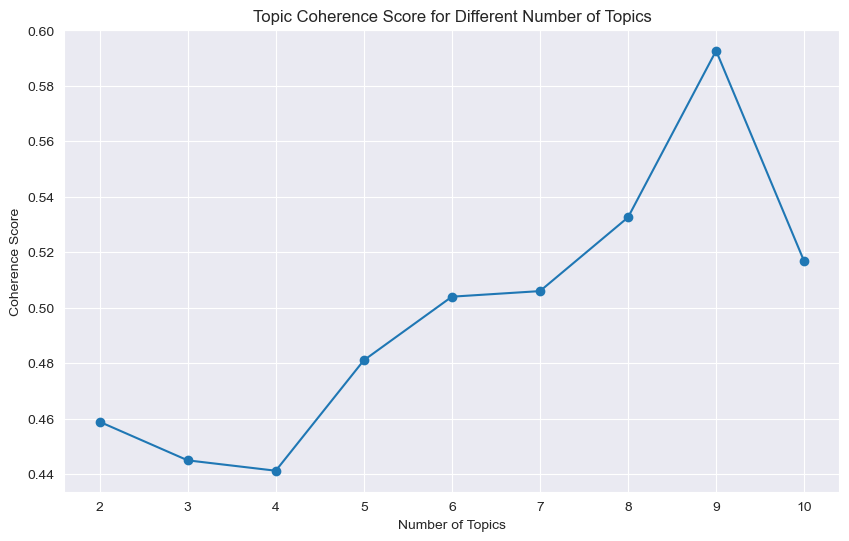

In [65]:
plt.figure(figsize=(10, 6))
plt.plot(topics_range, coherence_scores, marker='o')
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("Topic Coherence Score for Different Number of Topics")
plt.xticks(topics_range)
plt.show()

In [66]:
for m, cv in zip(topics_range, coherence_scores):
    print("Num Topics =", m, " has Coherence Scores of", round(cv, 4))

Num Topics = 2  has Coherence Scores of 0.4588
Num Topics = 3  has Coherence Scores of 0.4449
Num Topics = 4  has Coherence Scores of 0.4412
Num Topics = 5  has Coherence Scores of 0.481
Num Topics = 6  has Coherence Scores of 0.5039
Num Topics = 7  has Coherence Scores of 0.506
Num Topics = 8  has Coherence Scores of 0.5326
Num Topics = 9  has Coherence Scores of 0.5927
Num Topics = 10  has Coherence Scores of 0.5167


In [67]:
lda_model_1= gensim.models.ldamodel.LdaModel(corpus=doc_term_matrix,
                                           id2word=dictionary,
                                           num_topics=6, 
                                           random_state=10,
                                           update_every=1,
                                           chunksize=10,
                                           passes=2,
                                           alpha='auto',
                                           per_word_topics=True)

In [68]:
print(lda_model_1.print_topics())
doc_lda = lda_model_1[corpus]


[(0, '0.064*"font" + 0.029*"color" + 0.018*"travelocity" + 0.014*"arial" + 0.009*"align" + 0.009*"width" + 0.008*"nbsp" + 0.007*"caribbean" + 0.007*"style" + 0.007*"hour"'), (1, '0.027*"time" + 0.019*"meeting" + 0.018*"center" + 0.015*"view" + 0.015*"contact" + 0.013*"face" + 0.012*"internet" + 0.011*"book" + 0.011*"sun" + 0.010*"call"'), (2, '0.126*"excelr" + 0.024*"larry" + 0.023*"subject" + 0.021*"original" + 0.021*"october" + 0.016*"sent" + 0.015*"john" + 0.014*"message" + 0.012*"campbell" + 0.010*"monday"'), (3, '0.014*"market" + 0.008*"new" + 0.007*"would" + 0.006*"hours" + 0.006*"per" + 0.006*"today" + 0.005*"pjm" + 0.005*"make" + 0.005*"one" + 0.005*"july"'), (4, '0.061*"thru" + 0.060*"sat" + 0.057*"scheduled" + 0.044*"outages" + 0.042*"london" + 0.037*"fri" + 0.026*"outage" + 0.023*"impact" + 0.022*"icap" + 0.021*"pager"'), (5, '0.046*"image" + 0.041*"com" + 0.017*"nyiso" + 0.015*"please" + 0.011*"mail" + 0.011*"click" + 0.010*"free" + 0.010*"list" + 0.008*"following" + 0.008*

In [69]:
#Topic 0:
#This topic seems to be related to general assistance, decision-making, zones, pricing, and company matters.

#Topic 1:
#This topic appears to be about web design elements like fonts, colors, and HTML attributes. "Travelocity" and "Caribbean"
#might be related to specific design contexts.

#Topic 2:
#This topic seems to involve documents, possibly related to reports, attachments, subjects, and communication involving "Excelr" and "Larry."

#Topic 3:
#This topic appears to be a mix of conversational words and expressions. 

#Topic 4:
#This topic might be about market-related discussions, meetings, contacts, and dates in the context of "nyiso" and "pjm."

#Topic 5:
#This topic could be related to images, email communication, and information sharing, possibly within the context of "nyiso."

#Topic 6:
#This topic seems to involve scheduling, outages, and impacts, possibly in the context of "London"

In [70]:
import json

pyLDAvis.enable_notebook()
vis=pyLDAvis.gensim_models.prepare(lda_model_1,doc_term_matrix,dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.245550  0.118060       1        1  39.978429
5     -0.248080 -0.096445       2        1  22.828022
2      0.159953  0.072666       3        1  16.568910
1     -0.059028  0.042291       4        1  10.365172
0      0.156118 -0.351038       5        1   9.128921
4      0.236587  0.214466       6        1   1.130546, topic_info=             Term          Freq         Total Category  logprob  loglift
10         excelr  75076.000000  75076.000000  Default  30.0000  30.0000
4465        image  37984.000000  37984.000000  Default  29.0000  29.0000
12905        font  20957.000000  20957.000000  Default  28.0000  28.0000
28            com  33383.000000  33383.000000  Default  27.0000  27.0000
2694        larry  14397.000000  14397.000000  Default  26.0000  26.0000
...           ...           ...           ...      ...      ...      ...
84591    barkerde    153.945345    169.651198   Topic6  -5.5743   4.3853
6572   operations    441.384011   1070.788952   Topic6  -4.5210   3.5962
34       facility    356.180669   1354.470141   Topic6  -4.7355   3.1467
531          corp    494.999266   6219.110448   Topic6  -4.4064   1.9516
419       support    229.943402   4066.932220   Topic6  -5.1731   1.6097

[303 rows x 6 columns], token_table=       Topic      Freq     Term
term                           
1214       2  0.999794  account
1214       3  0.000228  account
697        2  0.999657  address
697        3  0.000299  address
11294      3  0.000575   agenda
...      ...       ...      ...
13953      3  0.000190   writes
136        1  0.999766     year
136        3  0.000158     year
2527       1  0.999644     zone
2527       3  0.000229     zone

[598 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 6, 3, 2, 1, 5])

In [71]:
# word embedding 

model = Word2Vec(data_words, vector_size=100, window=5, min_count=1, sg=0)  # Adjust parameters as needed

# Save the model
model.save("word2vec_model.bin")

# Load the model
# model = Word2Vec.load("word2vec_model.bin")

# Get word vector for a specific word
word_vector = model.wv['machine']
print("Vector for 'machine':", word_vector)

Vector for 'machine': [ 0.06539649  0.6386254  -0.02694397  0.5936419  -0.10050161 -0.9659531
 -0.42818153  0.18663171 -0.14240775 -0.23438516  0.40546456 -1.1873878
 -0.06948444 -0.86241806 -0.02979062  0.3104025  -0.382566    0.03596366
 -0.23272486 -0.7450802  -0.03314942 -0.06558167  0.1776198  -0.4346242
 -0.20382605  0.02691483 -0.27484602 -0.4021847   0.14545575 -0.22263767
  0.00195205 -0.03753566 -0.2079049   0.27794817 -0.15206371  0.46568477
  0.20031774  0.17207095 -0.5861168   0.1761813   0.27869412 -0.30787712
 -0.24024017  0.5779896   0.2366534   0.00494705 -0.35741463 -0.37580058
  0.38416916 -0.10238987  0.3592903  -0.20192471 -0.18423021 -0.26073748
  0.07652758  0.08858107  0.31842303  0.621254    0.49240622  0.14606667
  0.31466618  0.45192564  0.4291134   0.29890972 -0.10830253 -0.40264553
 -0.83601314  0.6126966   0.01747318  0.48570898 -0.48901328 -0.3163756
  0.13223621  0.5737857   0.95132196 -0.30451348 -0.3093657  -0.11276968
  0.81030047  0.14740033  0.10684

In [72]:
# using wordcloud module to see what words are repeating in Abusive messages
nlp = spacy.load('en_core_web_lg')
wc=WordCloud(width=2000,height=1200,min_font_size=10,background_color='black')

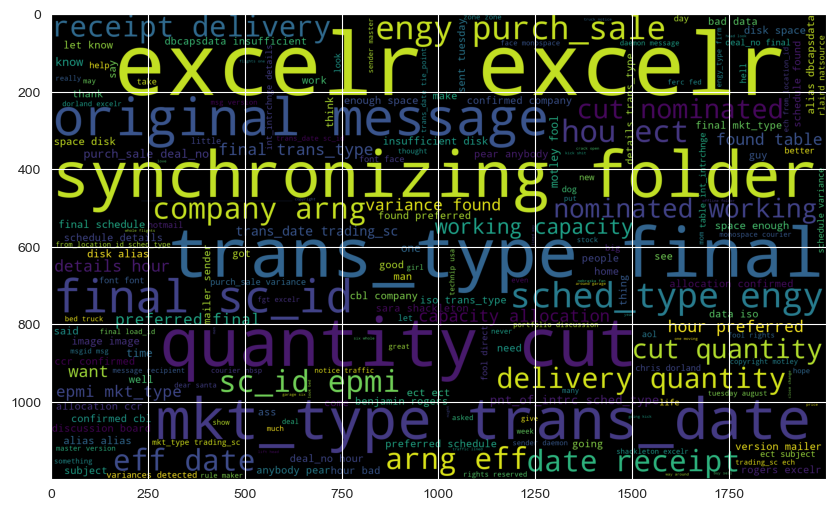

In [73]:
abusive_wc=wc.generate(df[df['Target']==0]['cleaned_mails'].str.cat(sep=" "))
plt.figure(figsize=(10,8))
plt.imshow(abusive_wc)

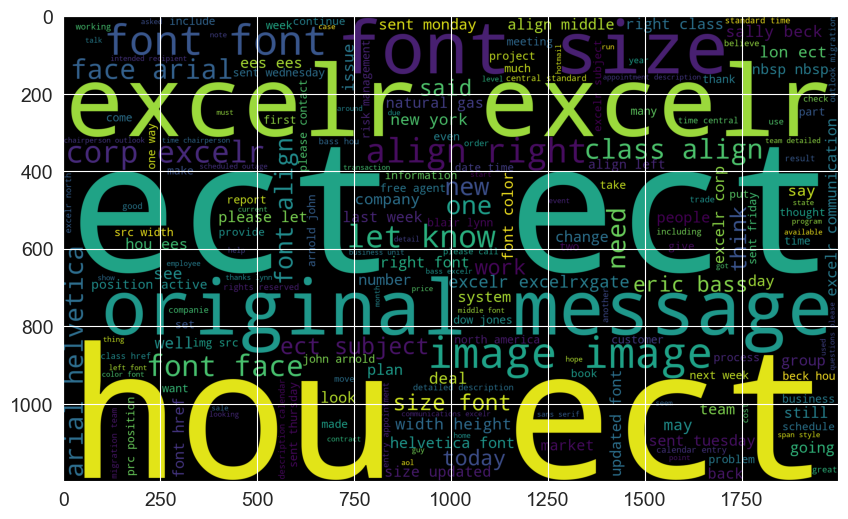

In [86]:
non_abusive_wc=wc.generate(df[df['Target']==1]['cleaned_mails'].str.cat(sep=" "))
plt.figure(figsize=(10,8))
plt.imshow(abusive_wc)


In [87]:
# named entity recognition
nlp = spacy.load('en_core_web_lg')
one_block = cleanedSentences[1300:5200]
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style= 'ent', jupyter= True)

In [88]:
# parts of speech
for token in doc_block[:30]:
    print(token,token.pos_)

ent PROPN
we PROPN
d PROPN
gomez PROPN
julie PROPN
lagrasta PROPN
fred PROPN
subject PROPN
shut PROPN
generate VERB
cash NOUN
flow NOUN
morning NOUN
produced VERB
marking VERB
desk NOUN
houston PROPN
deals VERB
small ADJ
midsize NOUN
independent ADJ
small ADJ
predominately ADV
unhedged ADJ
idea NOUN
originated VERB
statements NOUN
mark VERB
pappa PROPN
eog PROPN


In [89]:
one_block = cleanedSentences[1300:5200]
doc_block = nlp(one_block)
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[:30])


['generate', 'cash', 'flow', 'morning', 'produced', 'marking', 'desk', 'deals', 'midsize', 'idea', 'originated', 'statements', 'mark', 'shut', 'production', 'price', 'levels', 'response', 'intent', 'suggestion', 'trading', 'view', 'think', 'shut', 'ins', 'term', 'producers', 'looking', 'shut', 'levels']


In [90]:
cv = CountVectorizer() # Initialize a CountVectorizer instance
X = cv.fit_transform(nouns_verbs) # Fit and transform the text data
sum_words = X.sum(axis=0) # Calculate the sum of word occurrences across all documents (rows)

# Create a list of tuples containing words and their frequencies
words_freq = [(word,sum_words[0,idx]) for word, idx in cv.vocabulary_.items()]

# Sort the list of tuples based on word frequency in descending order
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

# Create a DataFrame from the sorted word frequency list
wd_df = pd.DataFrame(words_freq)
wd_df.columns = ['Words','Count']
wd_df[0:15]

,Words,Count
0,buy,11
1,think,7
2,sent,6
3,see,6
4,shut,5
5,cash,4
6,market,4
7,spread,4
8,know,3
9,message,3


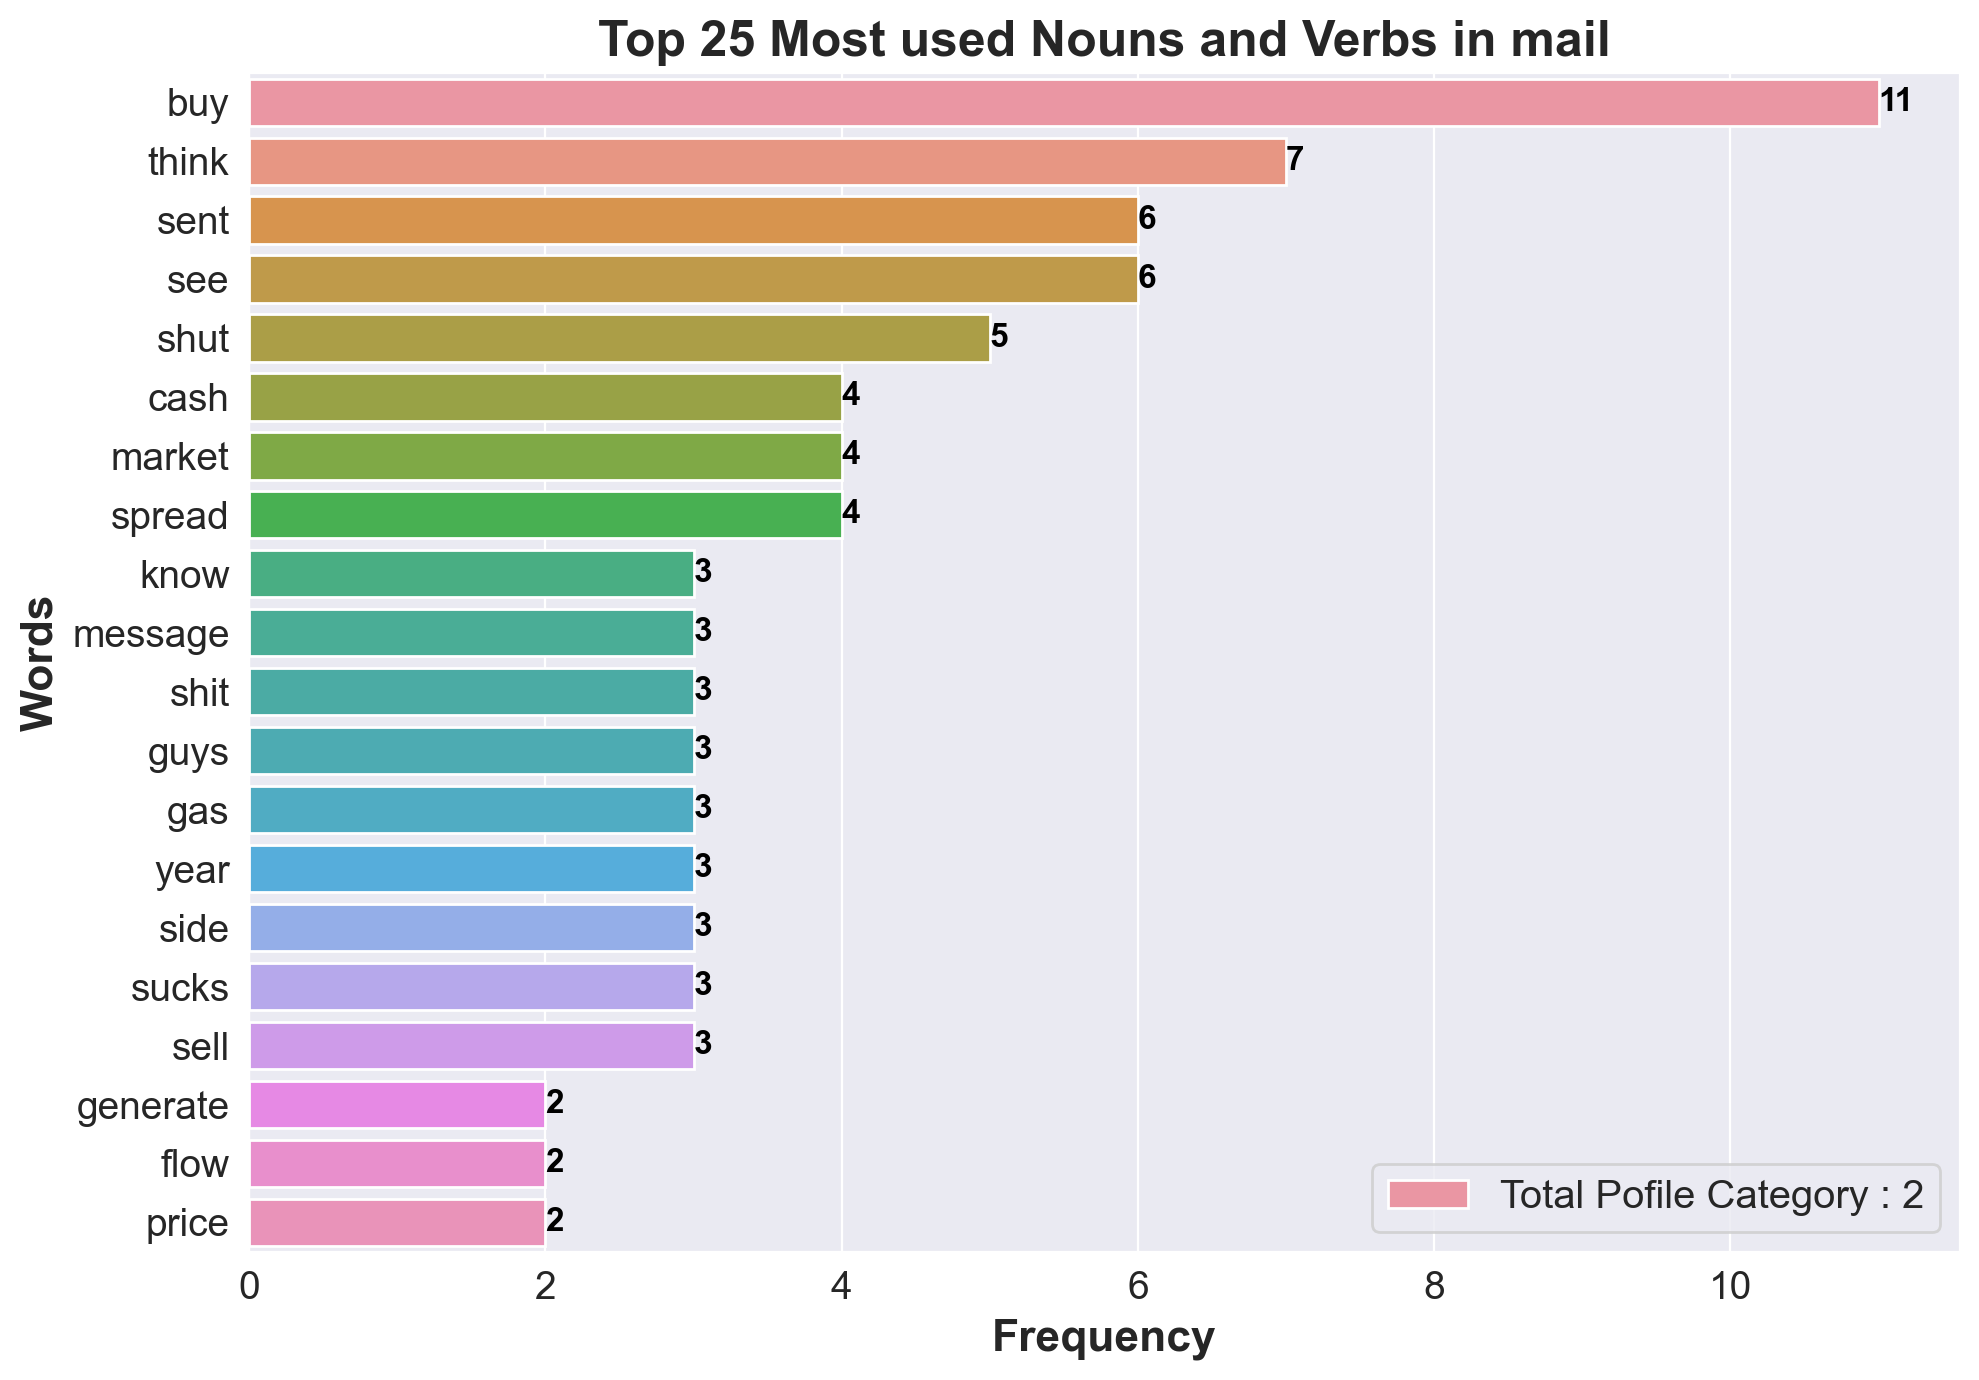

In [91]:
fig, axe = plt.subplots(1,1, figsize=(10,7), dpi=200)
ax = sns.barplot(x= wd_df['Count'].head(20), y= wd_df.Words.head(20), data= wd_df, ax = axe,
            label= 'Total Pofile Category : {}'.format(len(Mails.Target.unique())))

axe.set_xlabel('Frequency', size=16,fontweight= 'bold')
axe.set_ylabel('Words', size=16, fontweight= 'bold')
plt.xticks(rotation = 0)
plt.legend(loc='best', fontsize= 'x-large')
plt.title('Top 25 Most used Nouns and Verbs in mail', fontsize= 18, fontweight= 'bold')
rcParams = {'xtick.labelsize':'14','ytick.labelsize':'14','axes.labelsize':'16'}

for i in ax.containers:
    ax.bar_label(i,color = 'black', fontweight = 'bold', fontsize= 12)

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()

In [92]:
TextBlob(Mails['cleaned_mails'][1]).ngrams(1)[:6]

[WordList(['fuck'])]

In [93]:
TextBlob(Mails['cleaned_mails'][2]).ngrams(2)[:6]

[WordList(['gentlemen', 'following']),
 WordList(['following', 'champagne']),
 WordList(['champagne', 'available']),
 WordList(['available', 'approximate']),
 WordList(['approximate', 'retail']),
 WordList(['retail', 'price'])]

In [94]:
TextBlob(Mails['cleaned_mails'][3]).ngrams(3)[:100]

[WordList(['sorry', 'taken', 'long']),
 WordList(['taken', 'long', 'trying']),
 WordList(['long', 'trying', 'fend']),
 WordList(['trying', 'fend', 'chicks']),
 WordList(['fend', 'chicks', 'life']),
 WordList(['chicks', 'life', 'sooooo']),
 WordList(['life', 'sooooo', 'hard']),
 WordList(['sooooo', 'hard', 'sometimes']),
 WordList(['hard', 'sometimes', 'monkey']),
 WordList(['sometimes', 'monkey', 'brian']),
 WordList(['monkey', 'brian', 'rourke']),
 WordList(['brian', 'rourke', 'excelr']),
 WordList(['rourke', 'excelr', 'communications']),
 WordList(['excelr', 'communications', 'john']),
 WordList(['communications', 'john', 'arnold']),
 WordList(['john', 'arnold', 'hou']),
 WordList(['arnold', 'hou', 'ect']),
 WordList(['hou', 'ect', 'ect']),
 WordList(['ect', 'ect', 'subject']),
 WordList(['ect', 'subject', 'yeah']),
 WordList(['subject', 'yeah', 'monkey']),
 WordList(['yeah', 'monkey', 'monkey']),
 WordList(['monkey', 'monkey', 'hey']),
 WordList(['monkey', 'hey', 'little']),
 WordLi

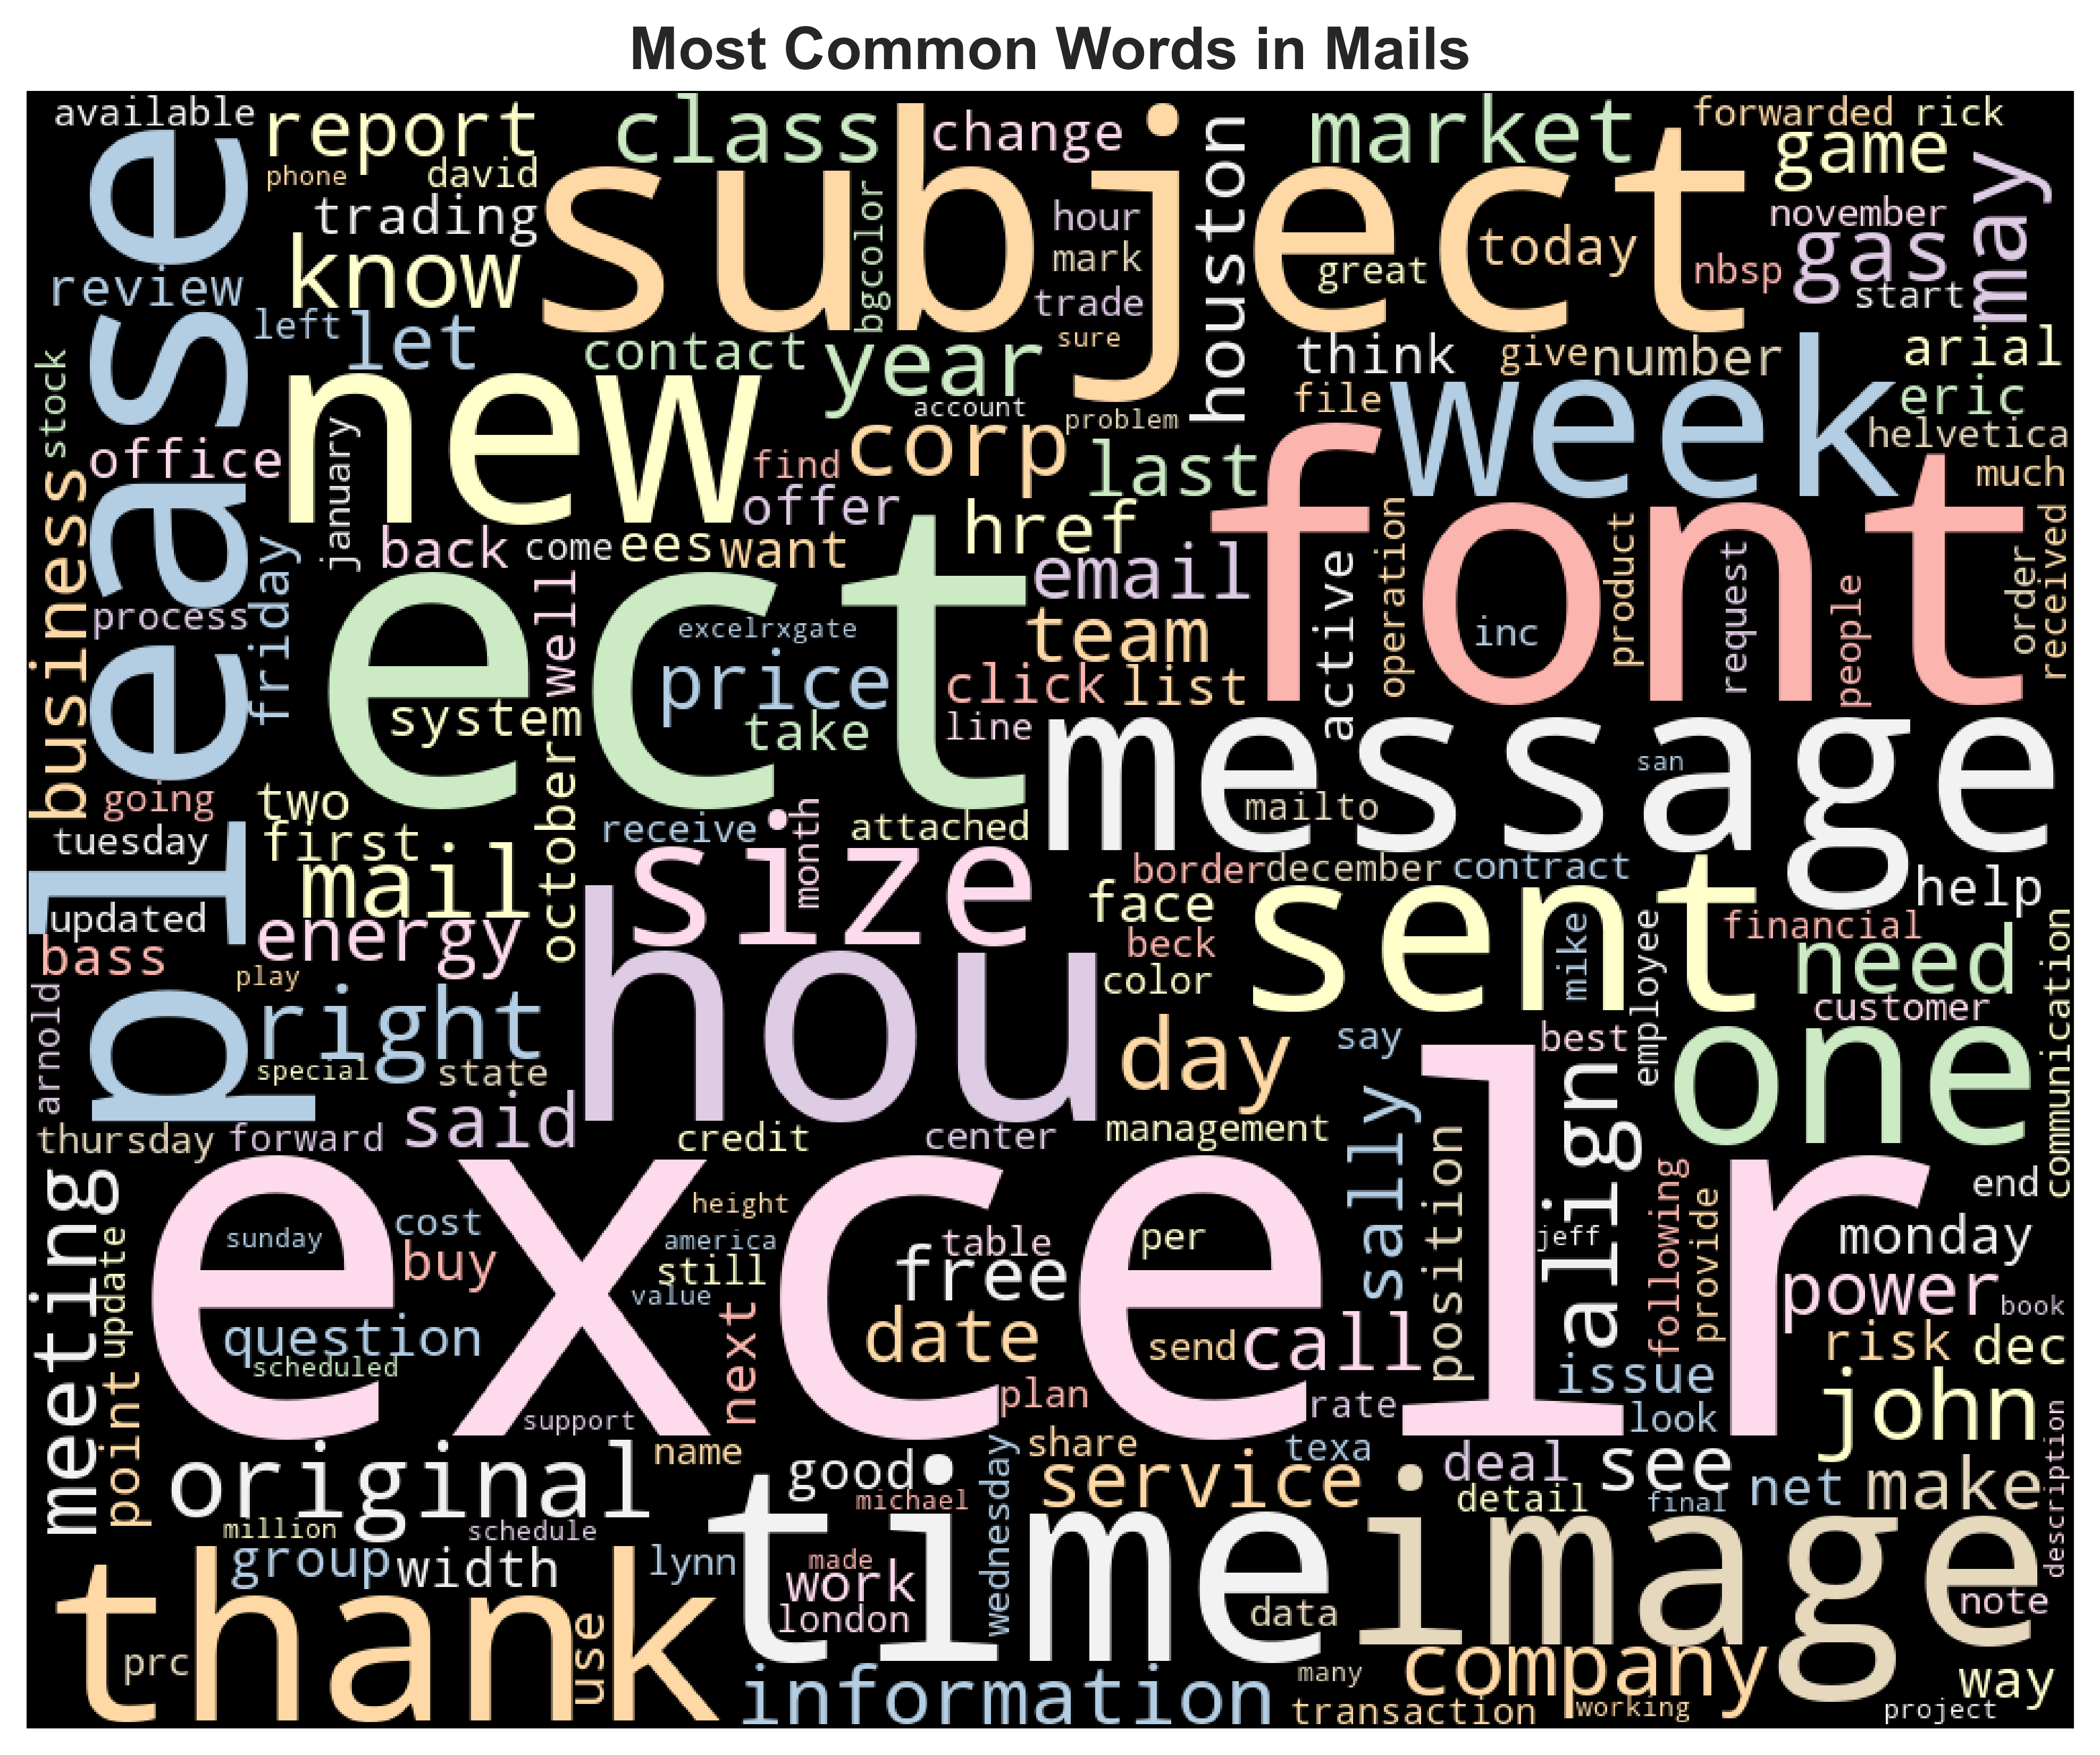

In [95]:
text = " ".join(str(item) for item in Mails.cleaned_mails) # Creating the text variable

word_cloud = WordCloud(width=1000, height=800, random_state=10, background_color="black",
                       colormap="Pastel1", collocations=False, stopwords=STOPWORDS).generate(text)

plt.figure(figsize=(10,8), dpi=500) # Display the generated Word Cloud
plt.title('Most Common Words in Mails', fontsize= 16, fontweight= 'bold')
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

In [96]:
text_data_cleaned = [str(text) if not isinstance(text, float) else "" for text in Mails]


In [97]:
smote= SMOTE(random_state=42)

In [98]:
X, y = make_classification(n_samples=1000, n_features=20, weights=[0.9, 0.1], random_state=42)

In [99]:
x,y = smote.fit_resample(X,y)

In [101]:
print("Class distribution after SMOTE:", Counter(y))

Class distribution after SMOTE: Counter({0: 897, 1: 897})


In [102]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)

In [103]:
x,y=ros.fit_resample(x,y)

In [104]:
Counter(y)

Counter({0: 897, 1: 897})

In [105]:
# model building 

In [106]:
Mails.dropna(inplace=True)

In [107]:
Mails.isnull().sum()

Target           0
cleaned_mails    0
dtype: int64

In [108]:
x = Mails['cleaned_mails'].values
y = Mails['Target'].values

In [109]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=45, test_size=0.25,stratify=y)
x_train.shape, x_test.shape

((18390,), (6130,))

In [110]:
tfidf_vector = TfidfVectorizer(sublinear_tf=True,stop_words='english')

In [111]:
x_train = tfidf_vector.fit_transform(x_train)
x_test = tfidf_vector.transform(x_test)


In [113]:
print(y_train),print(y_test)

[1 1 1 ... 1 1 1]
[0 1 1 ... 0 1 1]


(None, None)

In [112]:
model_knn = KNeighborsClassifier(n_neighbors=41)
model_knn.fit(x_train, y_train)
y_pred = model_knn.predict(x_test)
accuracy_knn = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_knn.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_knn.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_knn,classification_report(y_test, y_pred)))
nb_score = model_knn.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_knn = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_knn = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_knn = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_knn = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 0.95
Accuracy of  test set    : 0.95
Classification report for classifier KNeighborsClassifier(n_neighbors=41):
              precision    recall  f1-score   support

           0       0.96      0.31      0.47       410
           1       0.95      1.00      0.98      5720

    accuracy                           0.95      6130
   macro avg       0.96      0.65      0.72      6130
weighted avg       0.95      0.95      0.94      6130




In [114]:
model_DT = DecisionTreeClassifier(criterion='gini')
model_DT.fit(x_train, y_train)
y_pred = model_DT.predict(x_test)
accuracy_DT = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_DT.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_DT.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_DT,classification_report(y_test, y_pred)))
nb_score = model_DT.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_DT = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_DT= round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_DT = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_DT = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 0.97
Classification report for classifier DecisionTreeClassifier():
              precision    recall  f1-score   support

           0       0.78      0.80      0.79       410
           1       0.99      0.98      0.98      5720

    accuracy                           0.97      6130
   macro avg       0.88      0.89      0.89      6130
weighted avg       0.97      0.97      0.97      6130




In [115]:
model_RF = RandomForestClassifier(n_estimators=200)
model_RF.fit(x_train, y_train)
y_pred = model_RF.predict(x_test)
accuracy_RF = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_RF.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_RF.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_RF,classification_report(y_test, y_pred)))
nb_score = model_RF.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)


precision_RF = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_RF = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_RF = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_RF = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 0.97
Classification report for classifier RandomForestClassifier(n_estimators=200):
              precision    recall  f1-score   support

           0       0.97      0.63      0.77       410
           1       0.97      1.00      0.99      5720

    accuracy                           0.97      6130
   macro avg       0.97      0.82      0.88      6130
weighted avg       0.97      0.97      0.97      6130




In [116]:
model_svm = SVC()
model_svm.fit(x_train, y_train)
y_pred = model_svm.predict(x_test)
accuracy_svm = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_svm.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_svm.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_svm,classification_report(y_test, y_pred)))
nb_score = model_svm.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_svm = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_svm = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_svm = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_svm = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 0.98
Classification report for classifier SVC():
              precision    recall  f1-score   support

           0       0.97      0.66      0.79       410
           1       0.98      1.00      0.99      5720

    accuracy                           0.98      6130
   macro avg       0.97      0.83      0.89      6130
weighted avg       0.98      0.98      0.97      6130




In [117]:
model_lgr = LogisticRegression()
model_lgr.fit(x_train, y_train)
y_pred = model_lgr.predict(x_test)
accuracy_lgr = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_lgr.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_lgr.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_lgr,classification_report(y_test, y_pred)))
nb_score = model_lgr.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)


precision_lgr = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_lgr = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_lgr = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_lgr = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 0.97
Accuracy of  test set    : 0.97
Classification report for classifier LogisticRegression():
              precision    recall  f1-score   support

           0       0.98      0.52      0.68       410
           1       0.97      1.00      0.98      5720

    accuracy                           0.97      6130
   macro avg       0.97      0.76      0.83      6130
weighted avg       0.97      0.97      0.96      6130




In [118]:
model_bagg = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5)
model_bagg.fit(x_train, y_train)
y_pred = model_bagg.predict(x_test)
accuracy_bagg = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_bagg.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_bagg.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_bagg,classification_report(y_test, y_pred)))
nb_score = model_bagg.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_bagg = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_bagg = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_bagg = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_bagg = round(accuracy_score(y_test,y_pred),2)


Accuracy of training set : 0.94
Accuracy of  test set    : 0.94
Classification report for classifier BaggingClassifier(base_estimator=KNeighborsClassifier(), max_features=0.5,
                  max_samples=0.5):
              precision    recall  f1-score   support

           0       1.00      0.13      0.24       410
           1       0.94      1.00      0.97      5720

    accuracy                           0.94      6130
   macro avg       0.97      0.57      0.60      6130
weighted avg       0.95      0.94      0.92      6130




In [119]:
model_Adaboost = AdaBoostClassifier(n_estimators=100)
model_Adaboost.fit(x_train, y_train)
y_pred = model_Adaboost.predict(x_test)
accuracy_Adaboost = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_Adaboost.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_Adaboost.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_Adaboost,classification_report(y_test, y_pred)))
nb_score = model_Adaboost.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_Adaboost = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_Adaboost = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_Adaboost = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_Adaboost = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 0.97
Accuracy of  test set    : 0.97
Classification report for classifier AdaBoostClassifier(n_estimators=100):
              precision    recall  f1-score   support

           0       0.86      0.70      0.77       410
           1       0.98      0.99      0.99      5720

    accuracy                           0.97      6130
   macro avg       0.92      0.85      0.88      6130
weighted avg       0.97      0.97      0.97      6130




In [120]:
model_GradientBoost = GradientBoostingClassifier(n_estimators=100,learning_rate=1.0,max_depth=1, random_state=0)
model_GradientBoost.fit(x_train, y_train)
y_pred = model_GradientBoost.predict(x_test)
accuracy_GradientBoost = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_GradientBoost.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_GradientBoost.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_GradientBoost,classification_report(y_test, y_pred)))
nb_score = model_GradientBoost.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_Gradientboost = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_Gradientboost = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_Gradientboost = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_Gradientboost = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 0.96
Accuracy of  test set    : 0.96
Classification report for classifier GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=0):
              precision    recall  f1-score   support

           0       0.82      0.45      0.58       410
           1       0.96      0.99      0.98      5720

    accuracy                           0.96      6130
   macro avg       0.89      0.72      0.78      6130
weighted avg       0.95      0.96      0.95      6130




In [121]:
model_NB =MultinomialNB(alpha=1, fit_prior=False, class_prior=None)
model_NB.fit(x_train, y_train)
y_pred = model_NB.predict(x_test)
accuracy_NB = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_NB.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_NB.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_NB,classification_report(y_test, y_pred)))
nb_score = model_NB.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_NB = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_NB = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_NB = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_NB = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 0.95
Accuracy of  test set    : 0.94
Classification report for classifier MultinomialNB(alpha=1, fit_prior=False):
              precision    recall  f1-score   support

           0       0.78      0.22      0.34       410
           1       0.95      1.00      0.97      5720

    accuracy                           0.94      6130
   macro avg       0.86      0.61      0.66      6130
weighted avg       0.94      0.94      0.93      6130




In [122]:
Evaluation = {"Models":["KNN Classifier","DecisionTree Classifier","RandomForest Classifier","SVM Classifier",
                        "Logistic Regression","Bagging Classifier","AdaBoost Classifier","Gradient Boosting Classifier","Naive Bayes Classifier"],\
            "Train_Accuracy(%)":[model_knn.score(x_train, y_train),model_DT.score(x_train, y_train),model_RF.score(x_train, y_train),model_svm.score(x_train, y_train),model_lgr.score(x_train, y_train),
                                 model_bagg.score(x_train, y_train),model_Adaboost.score(x_train, y_train),model_GradientBoost.score(x_train, y_train), model_NB.score(x_train, y_train)],
            "Test_Accuracy(%)":[accuracy_knn,accuracy_DT,accuracy_RF,accuracy_svm,accuracy_lgr,accuracy_bagg,accuracy_Adaboost,accuracy_GradientBoost,accuracy_NB],\
            "Precision(%)":[precision_knn,precision_DT,precision_RF,precision_svm,precision_lgr,precision_bagg,precision_Adaboost,precision_Gradientboost,precision_NB],\
            "Recall(%)":[recall_knn,recall_DT,recall_RF,recall_svm,recall_lgr,recall_bagg,recall_Adaboost,recall_Gradientboost,recall_NB],\
            "F1-Score(%)":[f1_knn,f1_DT,f1_RF,f1_svm,f1_lgr,f1_bagg,f1_Adaboost,f1_Gradientboost,f1_NB]}
table = pd.DataFrame(Evaluation)
table

,Models,Train_Accuracy(%),Test_Accuracy(%),Precision(%),Recall(%),F1-Score(%)
0,KNN Classifier,0.952964,0.950000,0.96,0.65,0.72
1,DecisionTree Classifier,0.999946,0.970000,0.88,0.89,0.89
2,RandomForest Classifier,0.999946,0.970000,0.97,0.82,0.88
3,SVM Classifier,0.997064,0.980000,0.97,0.83,0.89
4,Logistic Regression,0.968189,0.970000,0.97,0.76,0.83
5,Bagging Classifier,0.941816,0.940000,0.97,0.57,0.60
6,AdaBoost Classifier,0.974769,0.970000,0.92,0.85,0.88
7,Gradient Boosting Classifier,0.960468,0.956933,0.89,0.72,0.78
8,Naive Bayes Classifier,0.948396,0.940000,0.86,0.61,0.66


In [123]:
model_names = ["KNN","DecisionTree","RandomForest ","SVM ", "Logistic Regression",
               "Bagging","AdaBoost","Gradient Boosting ","Naive Bayes"]
Test_accuracies = [accuracy_knn*100,accuracy_DT*100,accuracy_RF*100,
              accuracy_svm*100,accuracy_lgr*100,accuracy_bagg*100,
              accuracy_Adaboost*100,accuracy_GradientBoost*100,accuracy_NB*100]
Train_accuracies=[model_knn.score(x_train, y_train)*100,model_DT.score(x_train, y_train)*100,
                  model_RF.score(x_train, y_train)*100,model_svm.score(x_train, y_train)*100,
                  model_lgr.score(x_train, y_train)*100,model_bagg.score(x_train, y_train)*100,
                  model_Adaboost.score(x_train, y_train)*100,model_GradientBoost.score(x_train, y_train)*100,
                  model_NB.score(x_train, y_train)*100]

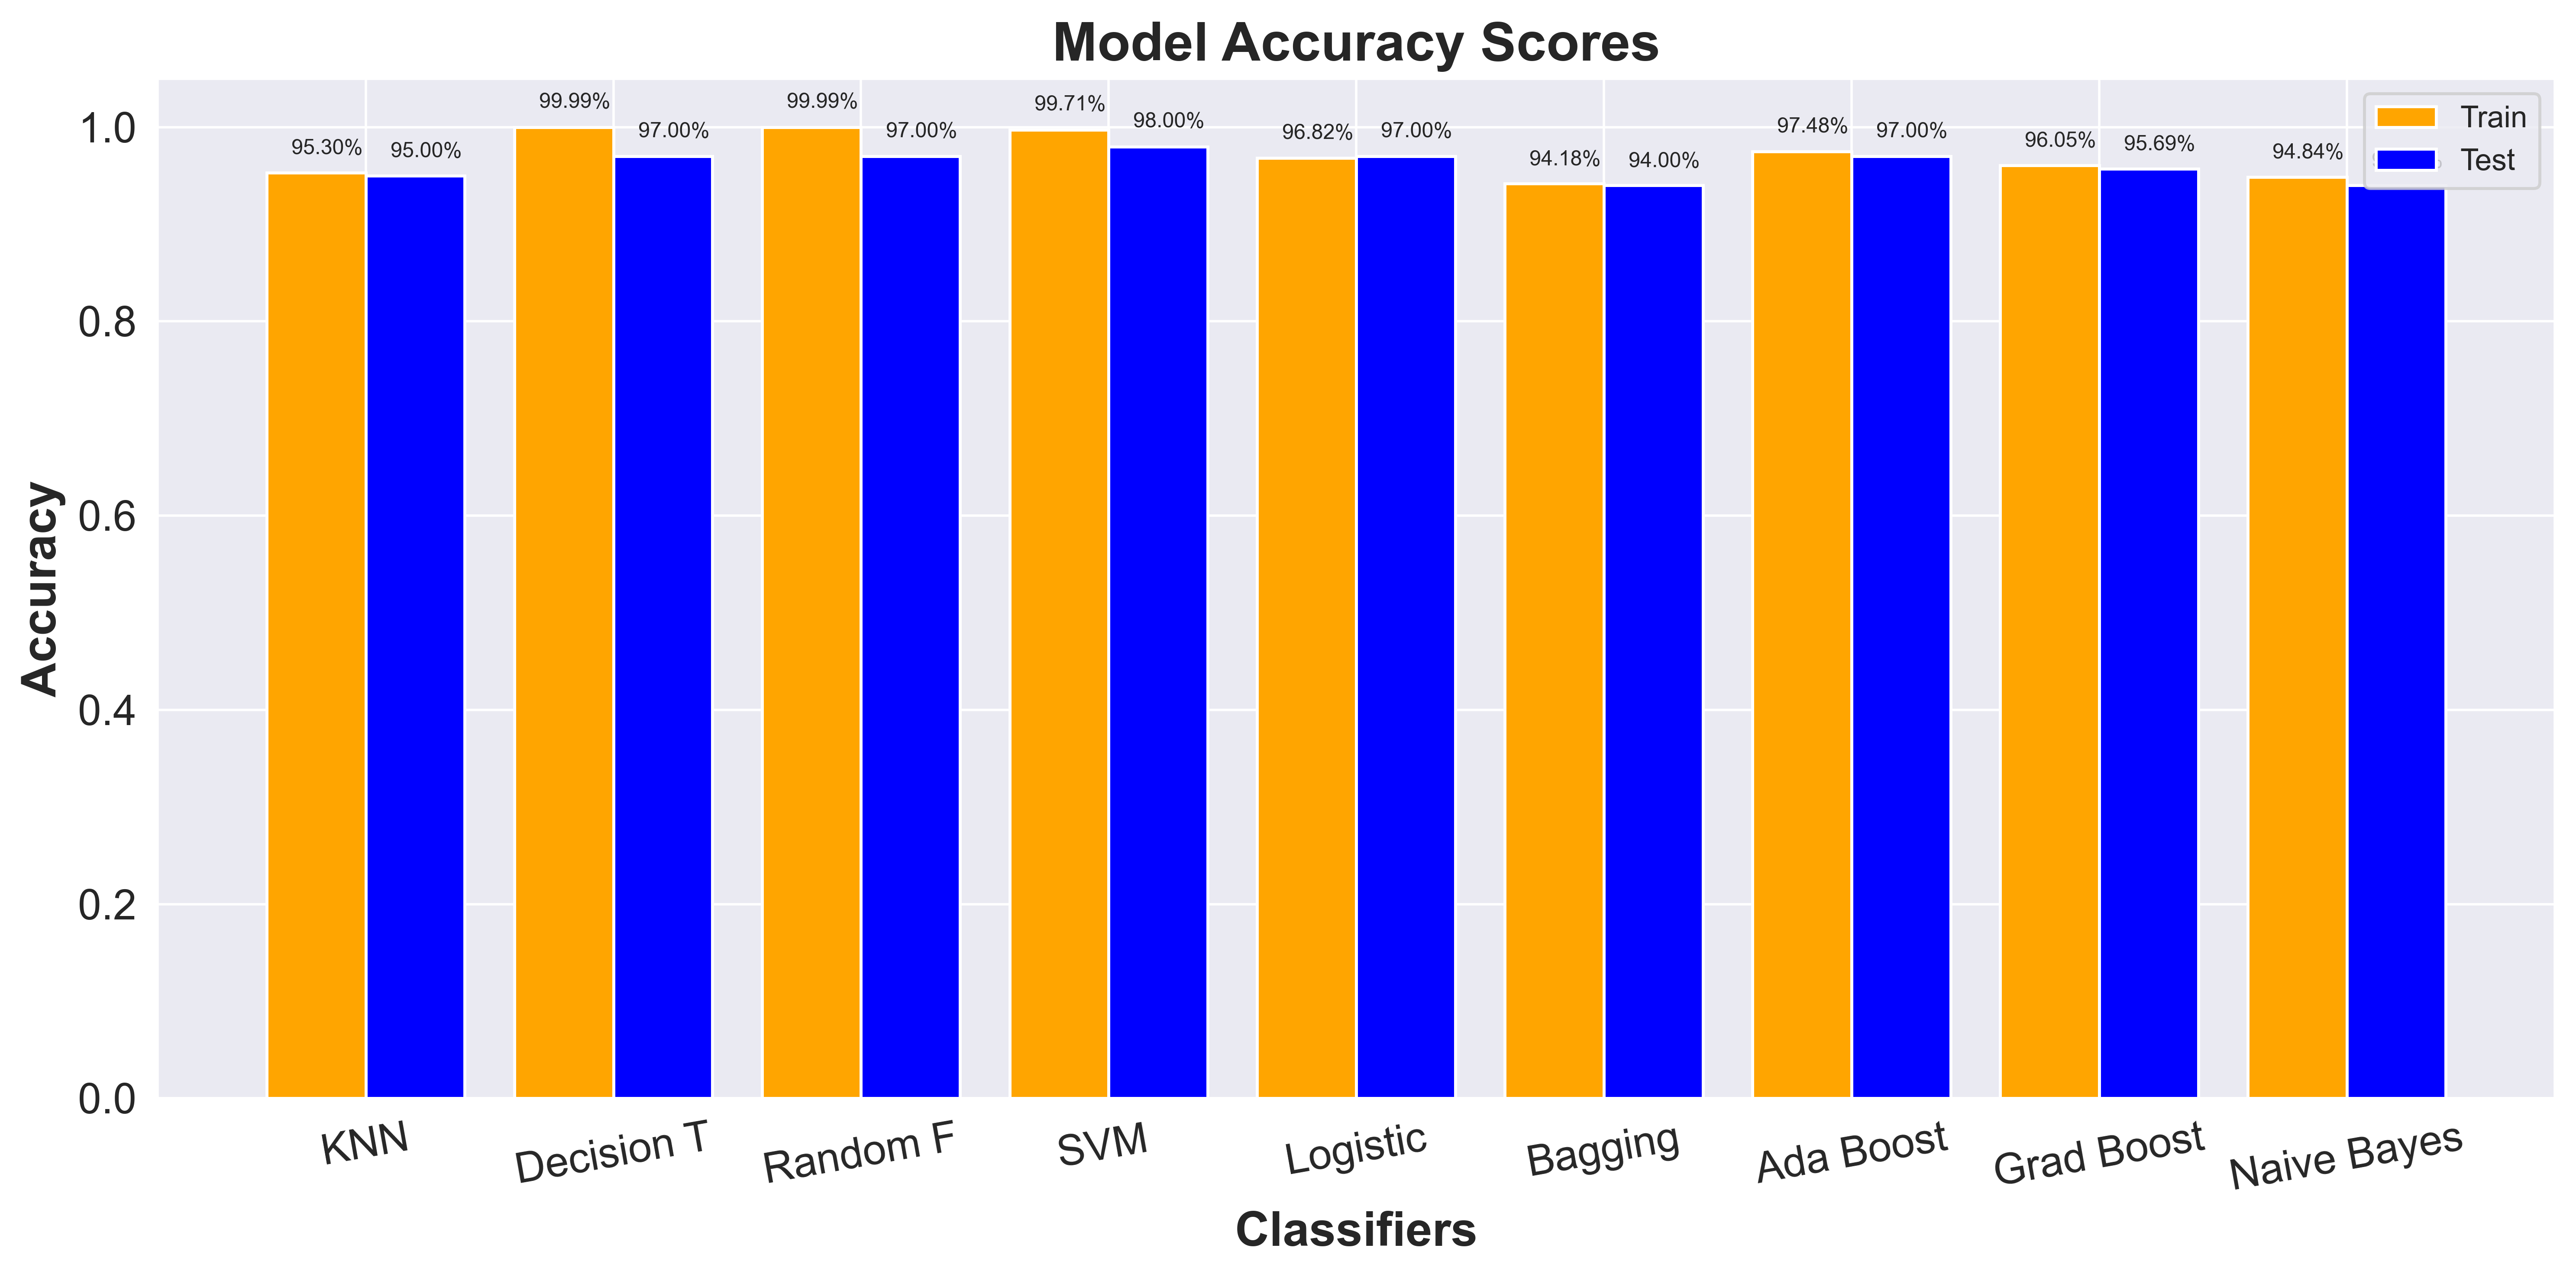

In [124]:
rcParams = {'xtick.labelsize':'12','ytick.labelsize':'14','axes.labelsize':'16'}
fig, axe = plt.subplots(1,1, figsize=(12,6), dpi=500)
x_pos = np.arange(len(table))
model_names = ["KNN", "Decision T", "Random F", "SVM ", "Logistic", "Bagging", "Ada Boost", "Grad Boost","Naive Bayes"]

bar1 = plt.bar(x_pos - 0.2, table['Train_Accuracy(%)'], width=0.4, label='Train', color= "Orange")
bar2 = plt.bar(x_pos + 0.2, table['Test_Accuracy(%)'], width=0.4, label='Test', color= "b")
plt.xticks(x_pos, model_names)

plt.xlabel("Classifiers", fontsize = 16, fontweight = 'bold')
plt.ylabel("Accuracy", fontsize = 16, fontweight = 'bold')
plt.title("Model Accuracy Scores", fontsize = 18, fontweight = 'bold')
plt.xticks(rotation = 10)
plt.legend()

for i, bar in enumerate(bar1):
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, bar.get_height()*1.02,
             s = '{:.2f}%'.format(Train_accuracies[i]), fontsize = 7)

for i, bar in enumerate(bar2):
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, bar.get_height()*1.02,
             s = '{:.2f}%'.format(Test_accuracies[i]), fontsize = 7)

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()


In [125]:
import joblib

# Save the model
joblib.dump(model_svm, 'model_svm.joblib')

['model_svm.joblib']

In [126]:
joblib.dump(tfidf_vector, 'tfidf_vector.joblib')

['tfidf_vector.joblib']

In [ ]:
import pickle
from pickle import dump
from pickle import load

In [ ]:
pickle.dump(model_svm,open('D:\email-classfication/model_svm','wb'))

In [ ]:
pickle.dump(tfidf_vector,open('D:\email-classfication/tfidf_vector.pickle','wb'))